# Part 1 - Initial IMDB Data Processing
- James M. Irving

## Business Problem

<img src="Images/movies-generic-header.png" width=300px>

> I have been hired to produce analyze IMDB's extensive publicly-available dataset, supplement it with financial data from TMDB's API, convert the raw data into a MySQL database, and then use that database for extracting insights and recommendations on how to make a successful movie.

I will use a combination of machine-learning-model-based insights and hypothesis testing to extract insights for our stakeholder.
    

  
### Specifications/Constraints    
- The stakeholder wants to focus on attributes of the movies themselves, vs the actors and directors connected to those movies. 
- They only want to include information related to movies released in the United States.
- They also did not want to include movies released before the year 2000.
- The stakeholder is particularly interested in how the MPAA rating, genre(s), runtime, budget, and production companies influence movie revenue and user-ratings.

# Initial IMDB Data Processing

### IMDB Movie Metadata
- I will download fresh movie metadata from IMDB's public datasets and filter out movies that meet the stakeholder's requirements/constraints.

- IMDB Provides Several Files with varied information for Movies, TV Shows, Made for TV Movies, etc.
    - Overview/Data Dictionary: <a href="https://www.imdb.com/interfaces/" target="_blank">https://www.imdb.com/interfaces/</a>

    - Downloads page: <a href="https://datasets.imdbws.com/" target="_blank">https://datasets.imdbws.com/</a>
- Files to use:
    - title.basics.tsv.gz
    - title.ratings.tsv.gz
    - title.akas.tsv.gz
  

<blockquote style="font-weight:bold;"> 👉<a href="#revisit">Click here</a> to jump to Part 1 - Revisited!</blockquote>

## Imports and Downloading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

In [2]:
## Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [3]:
## Making "Data" Folder to save IMDB files
os.makedirs("Data/",exist_ok=True)
sorted(os.listdir("Data/"))

['.DS_Store',
 '.ipynb_checkpoints',
 'For Tableau',
 'combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json']

## Processing Title Basics

In [4]:
## title basics 
url_title_basics = 'https://datasets.imdbws.com/title.basics.tsv.gz'
basics = pd.read_csv(url_title_basics, sep='\t',low_memory=False)
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599148 entries, 0 to 9599147
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 659.1+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


### Specified Filtering/Cleaning Steps:
- Permanent Steps
    - Replace "\N" with np.nan
    - keep only titleType==Movie
    - keep startYear 2000-2022
    
- Steps to Revisit/Reconsider:
    - Eliminate movies that include  "Documentary" in genre (see tip below)
    - Eliminate movies that are null for runtimeMinutes
    - Eliminate movies that are null for genre


In [5]:
# pf.check_nulls_nunique()
# def check_nulls_nunique(df,plot=True):
#     report = pd.DataFrame({"# null":df.isna().sum(),
#                  "% null":df.isna().sum()/len(df)*100,
#                  '# unique':df.nunique(),
#                           '% unique':df.nunique()/len(df)*100})
#     display(report.round(2))
#     if plot:
#         missingno.matrix(df)
#         plt.show()
    

#### Check for Nulls Values & \N placeholders

,# null,% null,# unique,% unique
tconst,0,0.0,9599148,100.00
titleType,0,0.0,11,0.00
primaryTitle,11,0.0,4368114,45.51
originalTitle,11,0.0,4389458,45.73
isAdult,0,0.0,9,0.00
startYear,0,0.0,152,0.00
endYear,0,0.0,97,0.00
runtimeMinutes,0,0.0,885,0.01
genres,10,0.0,2343,0.02


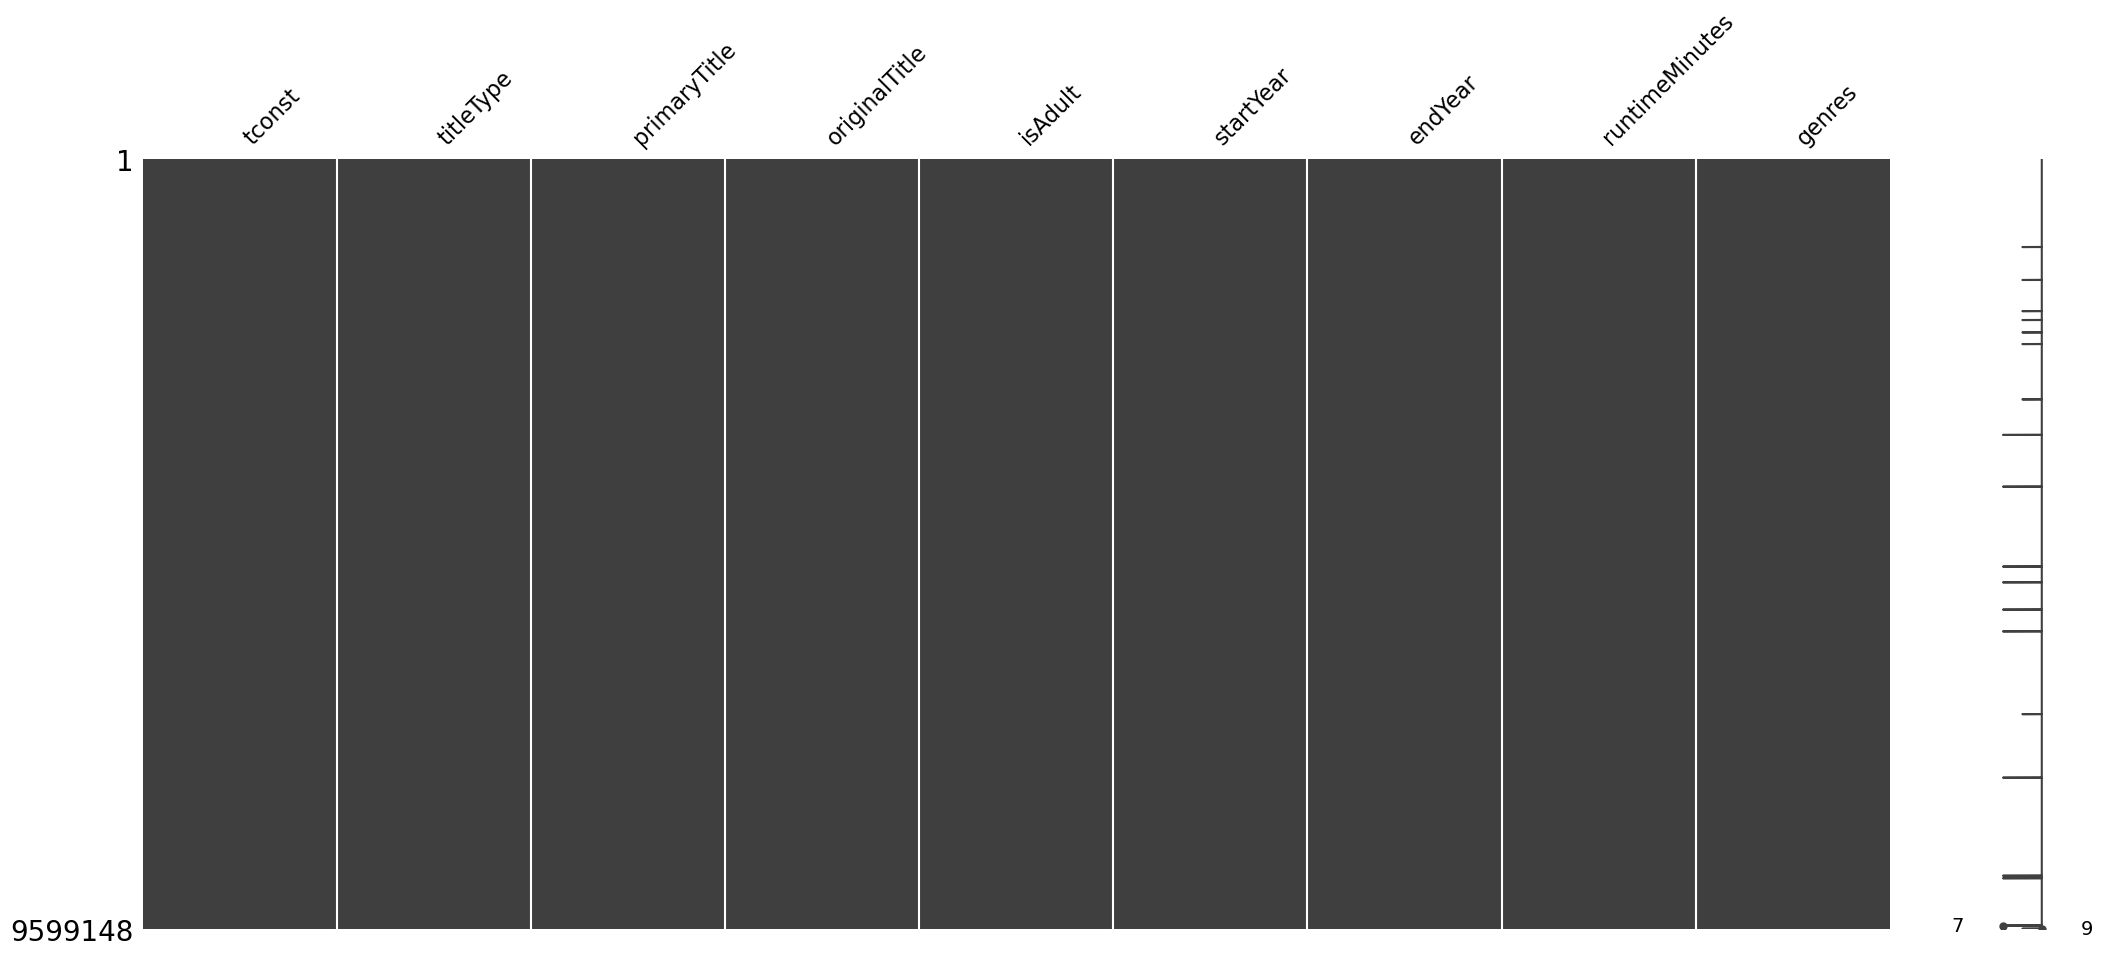

In [6]:
## checking null values
pf.check_nulls_nunique(basics)

,# null,% null,# unique,% unique
tconst,0,0.00,9599148,100.00
titleType,0,0.00,11,0.00
primaryTitle,11,0.00,4368114,45.51
originalTitle,11,0.00,4389458,45.73
isAdult,1,0.00,8,0.00
startYear,1295745,13.50,151,0.00
endYear,9496828,98.93,96,0.00
runtimeMinutes,6795247,70.79,884,0.01
genres,434072,4.52,2342,0.02


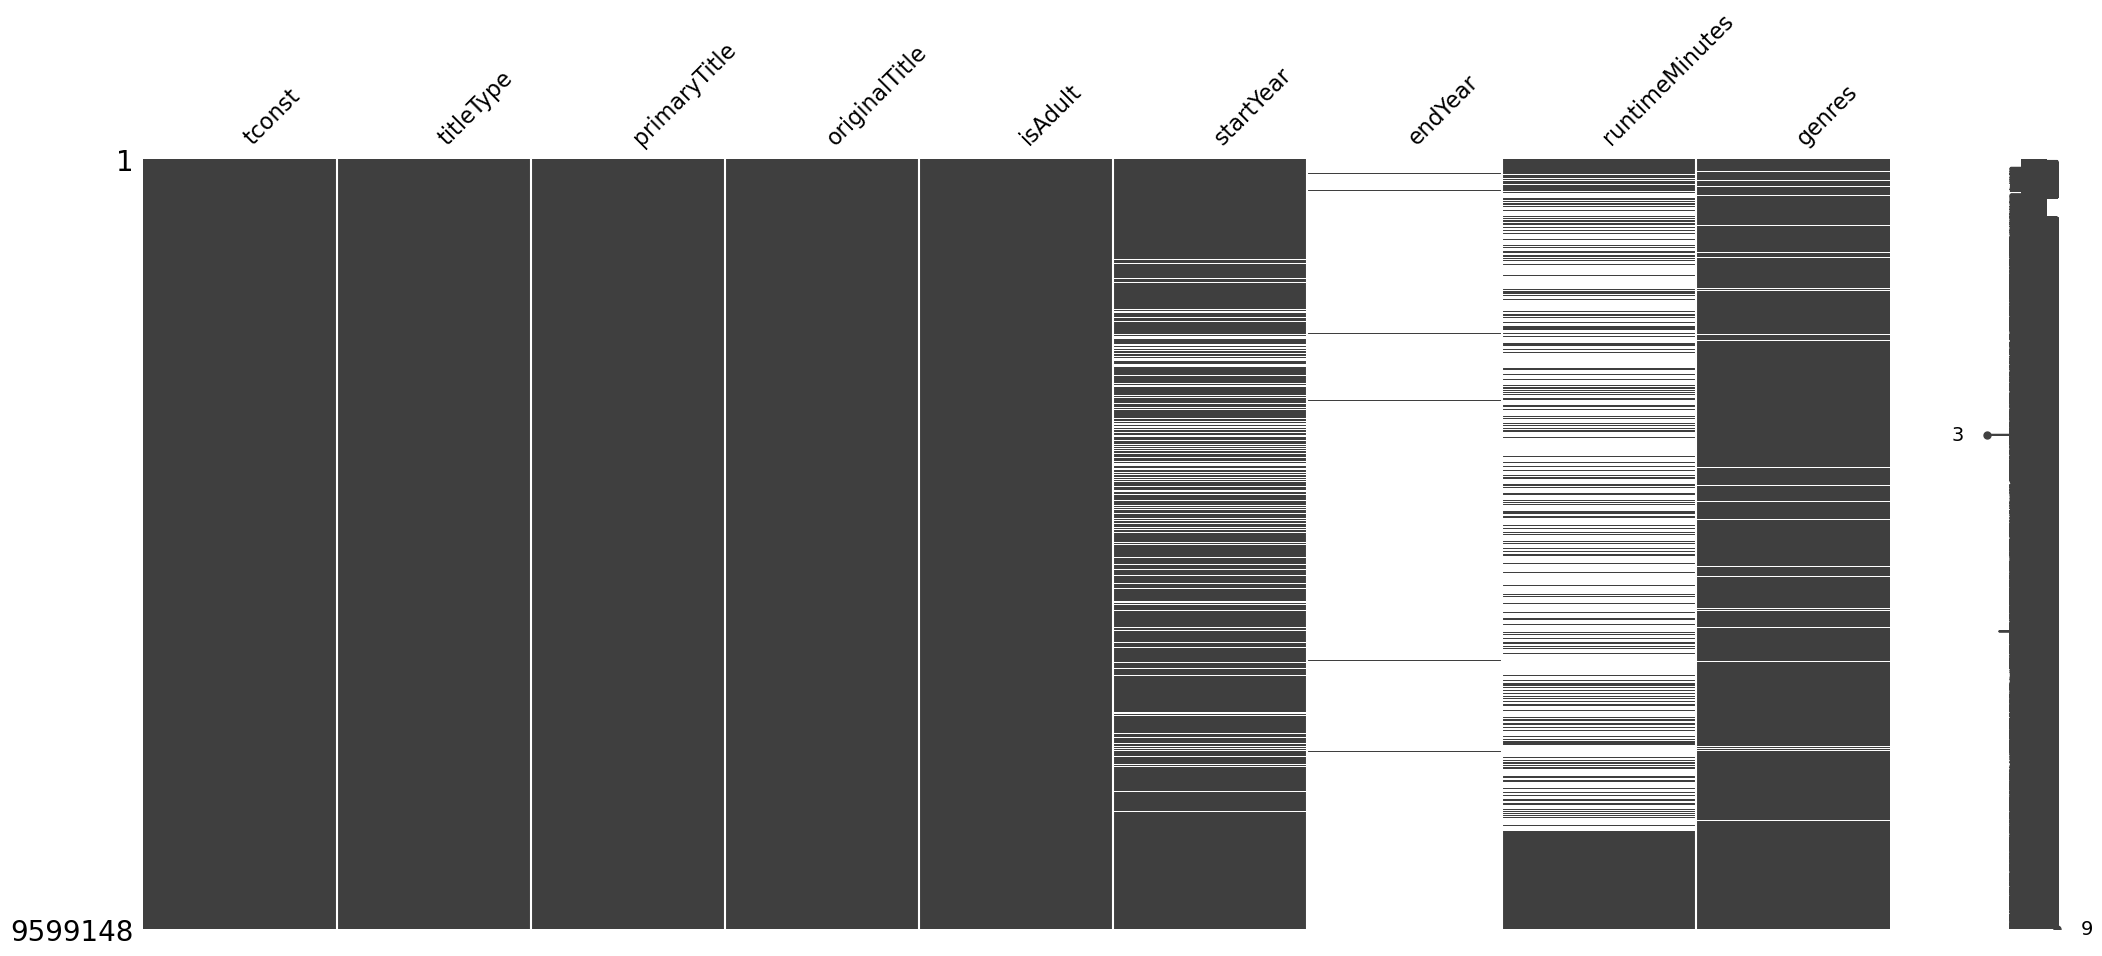

In [7]:
## Replace "\N" with np.nan
basics.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(basics)

##### Observations:
- Note: `endYear` is a pretty worthless column, in relation to movies. For TV shows, this would have potentially been worth keeping. 
    - Decision: Drop column.
- `tconst` vs `primary_title`:
    - I find it somehow odd that there are unique tconst values for every row, but that only ~ 46% of the titles are unique values.
        - Decision: change nothing, for now, but remember this for later.
        
- `genres` are missing for <5% of the movies.
    - Decision: we care about genre, so we will drop null values from genre.

- `startYear` is missing for 13% of the data. This may reflect movies that yet to be released.
    - Decision: drop null values for now. Alternative future approach would be to confirm movie status by joining with other table containing release information.
    
- `runtimeMinutes` is missing from a whopping 73% of the data. 
    - Decision: since this is a feature we care about, it is vital to our analysis. We will drop null values from this feature to reduce the overall number of API calls needed in Part 2.

In [8]:
## Eliminate movies that are null for runtimeMinute, genres, and startYear
basics = basics.dropna(subset=['runtimeMinutes','genres','startYear'])
pf.check_nulls_nunique(basics, plot=False)

,# null,% null,# unique,% unique
tconst,0,0.00,2573454,100.00
titleType,0,0.00,10,0.00
primaryTitle,1,0.00,1762051,68.47
originalTitle,1,0.00,1780414,69.18
isAdult,0,0.00,2,0.00
startYear,0,0.00,148,0.01
endYear,2525259,98.13,92,0.00
runtimeMinutes,0,0.00,865,0.03
genres,0,0.00,2213,0.09


In [9]:
## drop endYear
basics = basics.drop(columns=['endYear'])
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...
9599098,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary
9599104,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,43,"Family,Game-Show,Reality-TV"
9599139,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,11,"Adventure,Animation,Comedy"
9599146,tt9916856,short,The Wind,The Wind,0,2015,27,Short


### Filtering for Stakeholder Specifications

#### Keeping only Full-Length Movies Released in Theaters

In [10]:
## Checking title types
basics['titleType'].value_counts()

tvEpisode       1218889
short            584032
movie            370415
video            178164
tvMovie           90468
tvSeries          88285
tvSpecial         17616
tvMiniSeries      16706
tvShort            8563
videoGame           316
Name: titleType, dtype: int64

In [11]:
## keep only titleType==Movie
basics = basics.loc[ basics['titleType']=='movie']
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...
9598914,tt9916362,movie,Coven,Akelarre,0,2020,92,"Drama,History"
9598998,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama
9599039,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
9599066,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary


#### Eliminating Documentaries

In [12]:

is_documentary = basics['genres'].str.contains('documentary',case=False)
is_documentary.value_counts()

False    281529
True      88886
Name: genres, dtype: int64

In [13]:
# ## Eliminate movies that include  "Documentary" in genre 
# is_documentary = basics['genres'].str.contains('documentary',case=False)
# basics = basics[~is_documentary]
# basics.head()

In [14]:
### Convert startyear to numeric for slicing
## convert numeric features
basics['startYear'] = basics['startYear'].astype(float)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_35438/3247079554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics['startYear'] = basics['startYear'].astype(float)


In [15]:
## keep startYear 2000-2022
basics = basics[(basics['startYear']>=2000)&(basics['startYear']<2023)]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
13082,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021.0,133,Documentary
34803,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61116,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
67669,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
76059,tt0077684,movie,Histórias de Combóios em Portugal,Histórias de Combóios em Portugal,0,2022.0,46,Documentary
...,...,...,...,...,...,...,...,...
9598914,tt9916362,movie,Coven,Akelarre,0,2020.0,92,"Drama,History"
9598998,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019.0,123,Drama
9599039,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015.0,57,Documentary
9599066,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007.0,100,Documentary


## Processing Title Ratings

#### Specified Filtering Steps:
- Ratings
    - Replace "\N" with np.nan (if any)
    
- Keep movies that are in final filtered basics dataframe


In [16]:
## title ratings
url_title_ratings ="https://datasets.imdbws.com/title.ratings.tsv.gz"
ratings = pd.read_csv(url_title_ratings,sep='\t',low_memory=False)
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276961 entries, 0 to 1276960
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1276961 non-null  object 
 1   averageRating  1276961 non-null  float64
 2   numVotes       1276961 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 29.2+ MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,1949
1,tt0000002,5.8,264
2,tt0000003,6.5,1782
3,tt0000004,5.6,179
4,tt0000005,6.2,2583


,# null,% null,# unique,% unique
tconst,0,0.0,1276961,100.00
averageRating,0,0.0,91,0.01
numVotes,0,0.0,21033,1.65


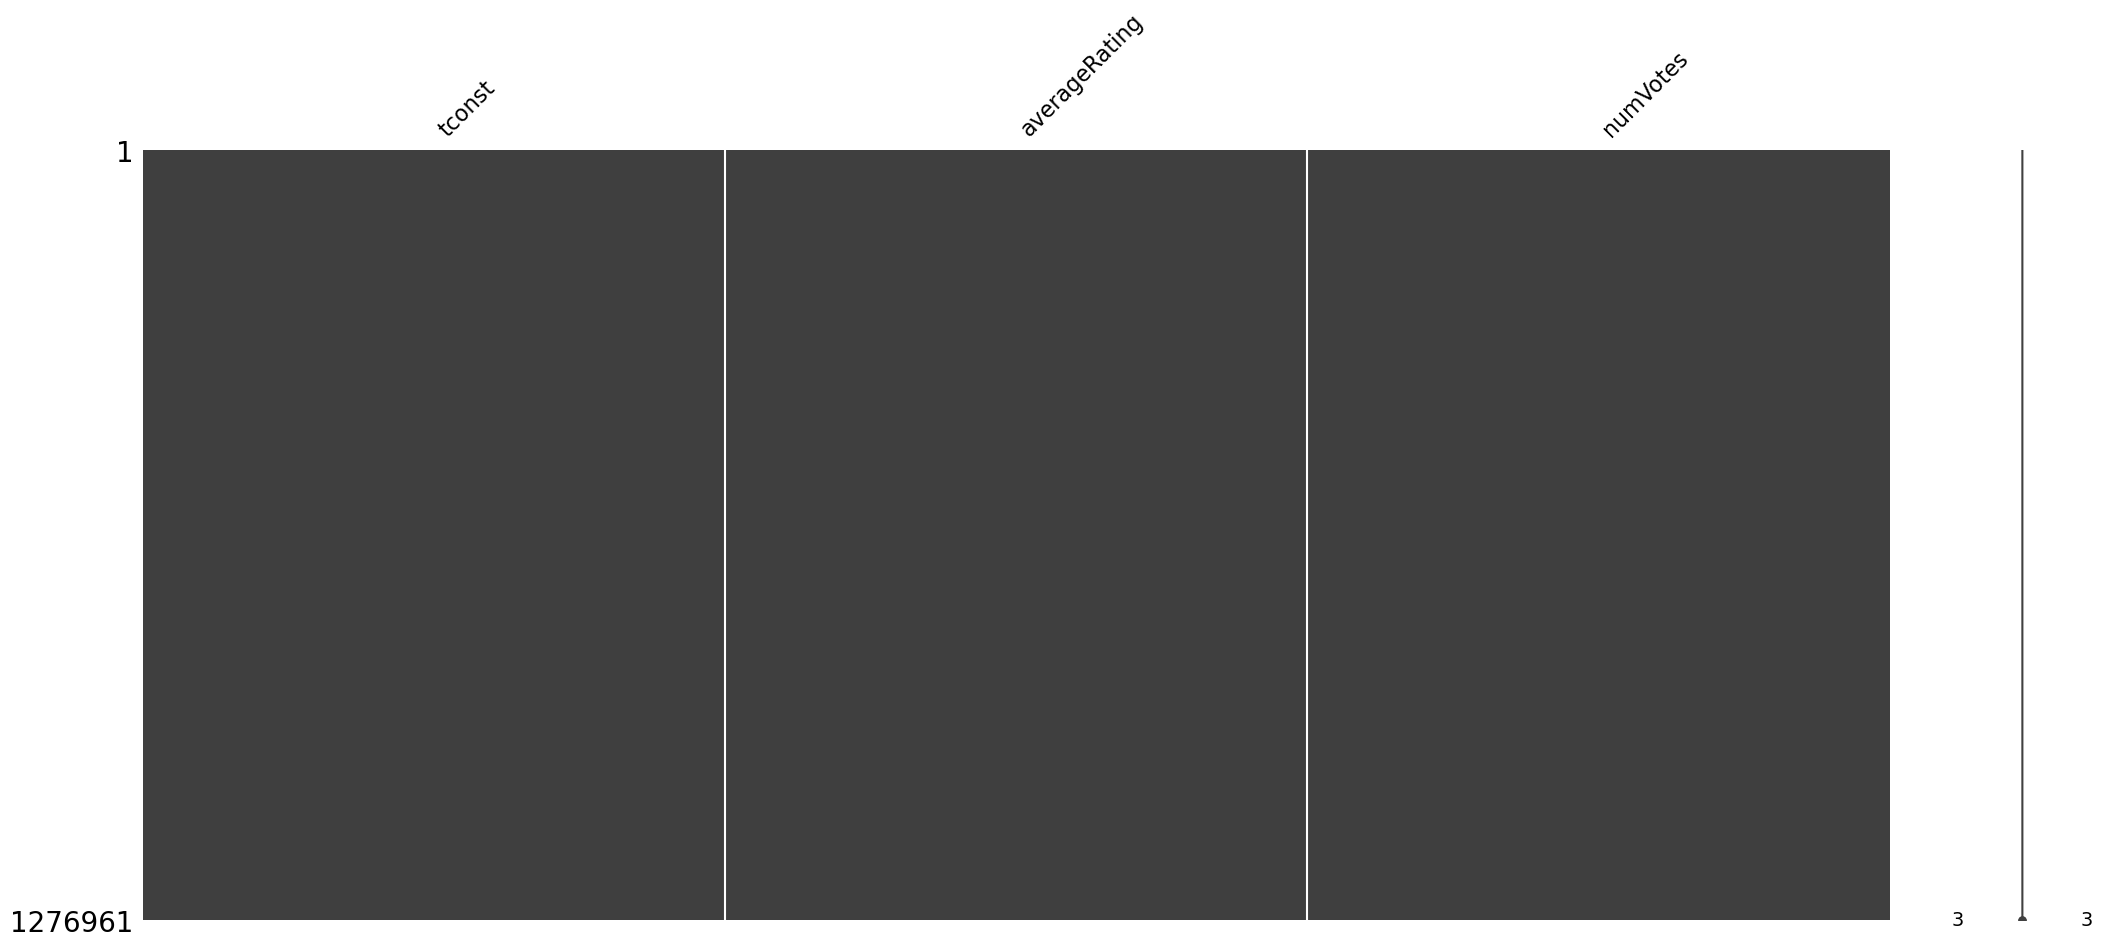

In [17]:
# Replace "\N" with np.nan (if any)
ratings.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(ratings)

## Processing Title AKAs

#### Specified Filtering Steps:
- keep only US entries.
- Replace "\N" with np.nan

In [18]:
## title AKAs
url_title_akas ="https://datasets.imdbws.com/title.akas.tsv.gz"
akas = pd.read_csv(url_title_akas,sep='\t',low_memory=False)
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34855752 entries, 0 to 34855751
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 2.1+ GB


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [19]:
## The AKAs file has the information on country where it released and language
akas = akas[(akas['region'] == 'US')]
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,\N,imdbDisplay,\N,0
36,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
41,tt0000005,6,Blacksmith Scene #1,US,\N,alternative,\N,0
...,...,...,...,...,...,...,...,...
34855279,tt9916560,1,March of Dimes Presents: Once Upon a Dime,US,\N,imdbDisplay,\N,0
34855349,tt9916620,1,The Copeland Case,US,\N,\N,\N,0
34855437,tt9916702,1,Loving London: The Playground,US,\N,\N,\N,0
34855480,tt9916756,1,Pretty Pretty Black Girl,US,\N,imdbDisplay,\N,0


In [20]:
# ## check for null values
# akas.isna().sum()

,# null,% null,# unique,% unique
titleId,0,0.00,1331174,94.25
ordering,0,0.00,117,0.01
title,0,0.00,1091484,77.28
region,0,0.00,1,0.00
language,1408529,99.73,8,0.00
types,440106,31.16,13,0.00
attributes,1366407,96.75,163,0.01
isOriginalTitle,1345,0.10,2,0.00


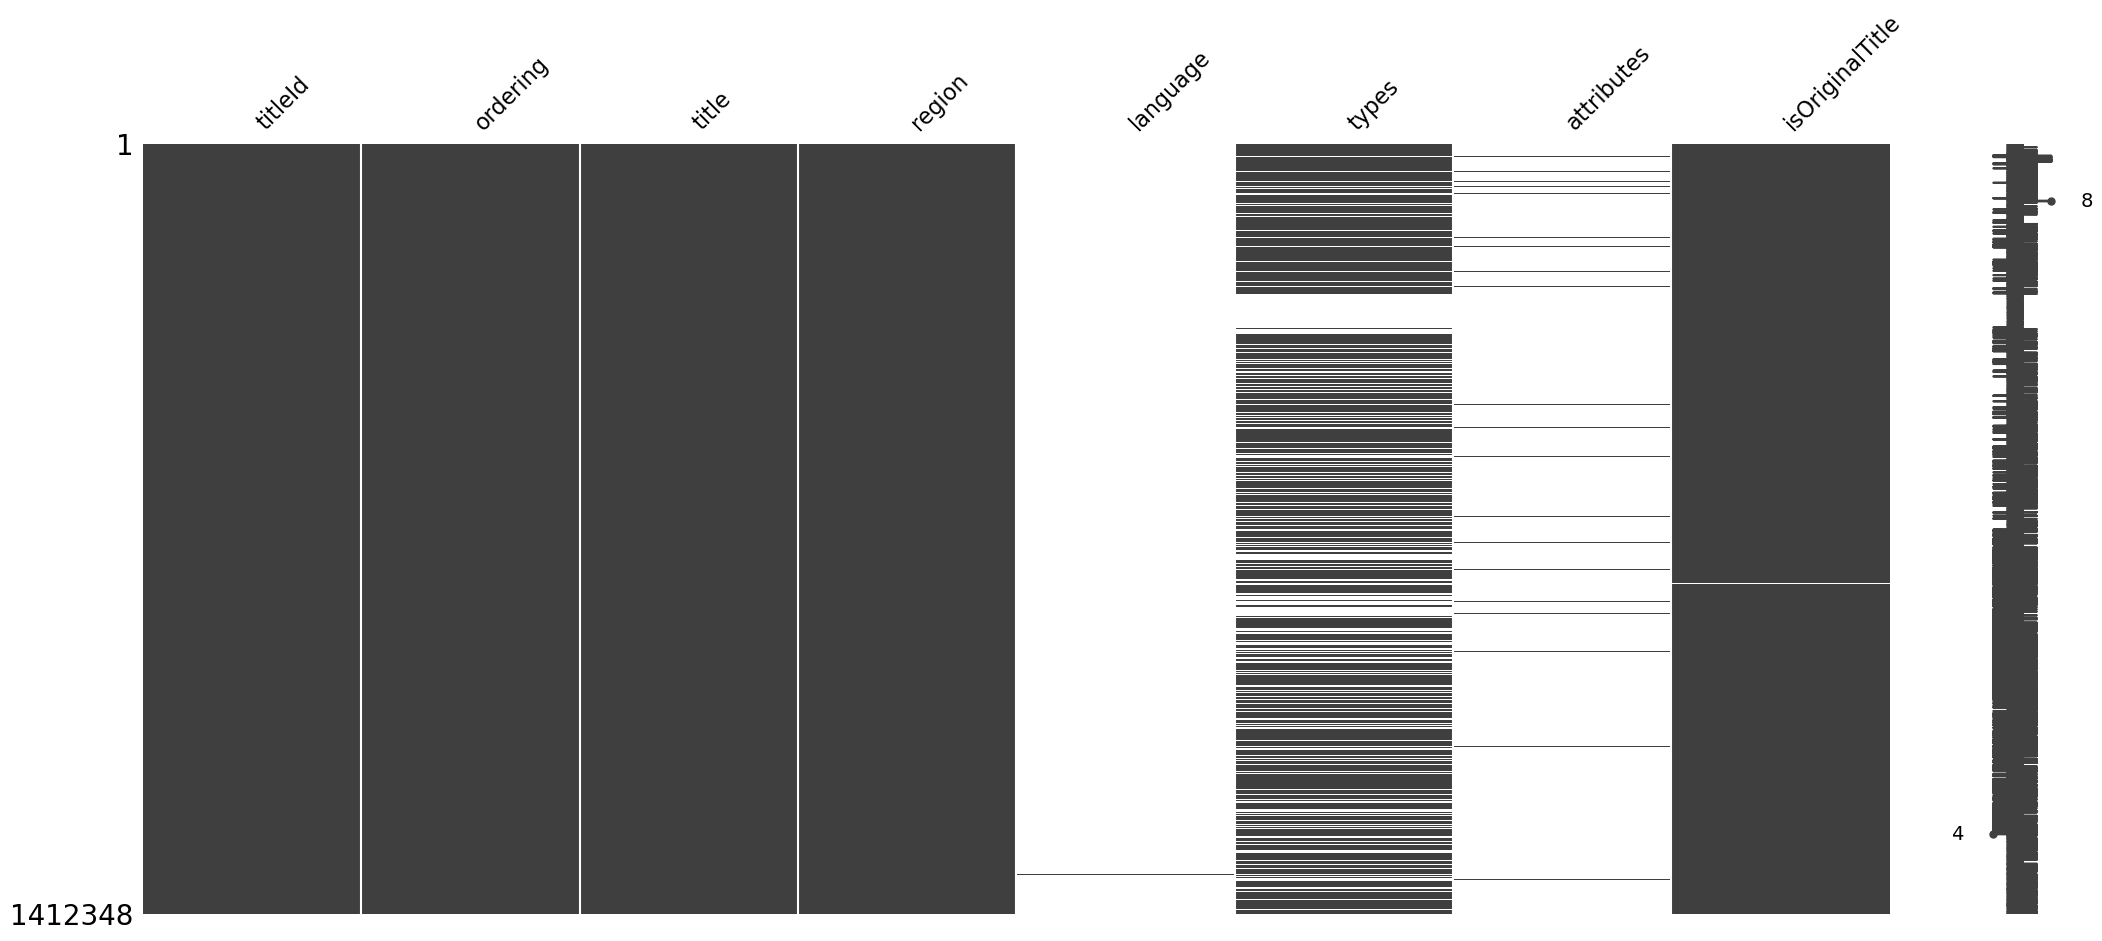

In [21]:
## replace\N placeholders with NaN and re-check for nuls
akas.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(akas)

#### Observations:
- `language`: workthless, drop it.
- `types`: explore

In [22]:
akas.drop(columns='language',inplace=True)
akas.head()

,titleId,ordering,title,region,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0


#### Exploring Types

<AxesSubplot: >

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2 () missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


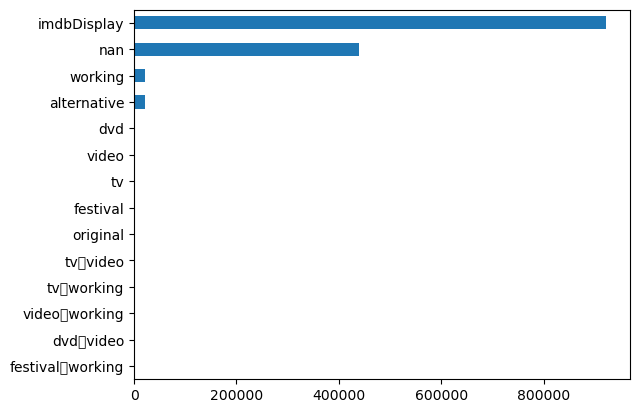

In [23]:
akas['types'].value_counts(dropna=False).sort_values().plot(kind='barh')

> Keep all types, since this table will mainly be used for filtering region and perhaps referenced later for comparing duplicate titles that had unique ids in title basics.

## Final Filtering: Removing Non-US Movies

- Now that both AKAs and basics have been processed, we can remove any movie ids from title basics that are NOT in the US-filtered AKAs dataframe.

### Removing Non-US From Title Basics

In [24]:
## Only keep movie ids that are in the final filtered akas
keepers = basics['tconst'].isin(akas['titleId'])
basics = basics[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
34803,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61116,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
67669,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
86801,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,100,"Comedy,Horror,Sci-Fi"
93938,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,126,Drama
...,...,...,...,...,...,...,...,...
9598502,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019.0,70,Documentary
9598681,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,97,"Comedy,Drama,Fantasy"
9598821,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,51,Drama
9598830,tt9916190,movie,Safeguard,Safeguard,0,2020.0,95,"Action,Adventure,Thriller"


### Removing Non-US From Ratings

- I originally used the AKAs table to filter out which movies to keep from ratings.
- I decided to compare using the AKAs table VS the using the basics table, which has already had non-US movies removed.
- Since I will 

In [25]:
## Keeping only movie that exist in basics 
keepers_akas = ratings['tconst'].isin(akas['titleId'])
keepers_basics = ratings['tconst'].isin(basics['tconst'])

print('- If filter using AKAs:')
display(keepers_akas.value_counts())

print('- If filter using Basics:')
display(keepers_basics.value_counts())

- If filter using AKAs:


False    788940
True     488021
Name: tconst, dtype: int64

- If filter using Basics:


False    1187279
True       89682
Name: tconst, dtype: int64

> **MUST DECIDE HOW TO DETERMINE FINAL KEEERS AND IF REMOVING DOCUMENTARIES OR NOT**

In [26]:
ratings_final = ratings[keepers_basics]
ratings_final

,tconst,averageRating,numVotes
17730,tt0035423,6.4,85981
40455,tt0062336,6.4,164
46320,tt0069049,6.7,7553
63284,tt0088751,5.3,328
69585,tt0096056,5.6,831
...,...,...,...
1276896,tt9915436,7.4,5
1276910,tt9915872,7.3,8
1276923,tt9916170,7.0,7
1276924,tt9916190,3.7,241


## Saving Final Files

#### Saving Title Basics

In [27]:
## Saving and immediately loading (to verify)
basics.to_csv('Data/title_basics_cleaned.csv.gz',compression='gzip',index=False)
basics = pd.read_csv('Data/title_basics_cleaned.csv.gz')
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118427 entries, 0 to 118426
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          118427 non-null  object 
 1   titleType       118427 non-null  object 
 2   primaryTitle    118427 non-null  object 
 3   originalTitle   118427 non-null  object 
 4   isAdult         118427 non-null  int64  
 5   startYear       118427 non-null  float64
 6   runtimeMinutes  118427 non-null  int64  
 7   genres          118427 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.2+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,126,Drama


#### Saving Title Ratings

In [28]:
ratings_final.to_csv('Data/title_ratings_cleaned.csv.gz',compression='gzip',index=False)
ratings = pd.read_csv('Data/title_ratings_cleaned.csv.gz')
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89682 entries, 0 to 89681
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         89682 non-null  object 
 1   averageRating  89682 non-null  float64
 2   numVotes       89682 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


,tconst,averageRating,numVotes
0,tt0035423,6.4,85981
1,tt0062336,6.4,164
2,tt0069049,6.7,7553
3,tt0088751,5.3,328
4,tt0096056,5.6,831


#### Saving Title AKAs

In [29]:
akas.to_csv('Data/title_akas_cleaned.csv.gz',compression='gzip',index=False)
akas = pd.read_csv('Data/title_akas_cleaned.csv.gz')
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412348 entries, 0 to 1412347
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   titleId          1412348 non-null  object 
 1   ordering         1412348 non-null  int64  
 2   title            1412348 non-null  object 
 3   region           1412348 non-null  object 
 4   types            972242 non-null   object 
 5   attributes       45941 non-null    object 
 6   isOriginalTitle  1411003 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 75.4+ MB


,titleId,ordering,title,region,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0.0


### Optional Check for files in Data folder

In [30]:
# optional 
sorted(os.listdir("Data/"))

['.DS_Store',
 '.ipynb_checkpoints',
 'For Tableau',
 'combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json']

## Final Movie Count

In [31]:
print(f"There are {len(basics):,} rows in title_basics")
print(f"There are {len(ratings):,} rows in title_ratings")
print(f"There are {len(akas):,} rows in akas")

There are 118,427 rows in title_basics
There are 89,682 rows in title_ratings
There are 1,412,348 rows in akas


> See notebook "`Part 2A - TMDB API Calls.ipynb`" for the next part of the analysis.

<a name="revisit"> </a>
# **Part 1 - Revisited: Extracting IMDB Data on Cast/Crew**

- 02/10/23

In [32]:
name_basics_url = "https://datasets.imdbws.com/name.basics.tsv.gz"
title_crew_url ="https://datasets.imdbws.com/title.crew.tsv.gz"
title_principals_url = "https://datasets.imdbws.com/title.principals.tsv.gz"

## Title Crew

In [33]:
title_crew = pd.read_csv(title_crew_url, sep='\t')
title_crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
9599143,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
9599144,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
9599145,tt9916852,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
9599146,tt9916856,nm10538645,nm6951431


In [34]:
keepers = title_crew['tconst'].isin(basics['tconst'])
keepers.sum()

118427

In [35]:
title_crew = title_crew[keepers]
title_crew

,tconst,directors,writers
34803,tt0035423,nm0003506,"nm0737216,nm0003506"
61116,tt0062336,"nm0749914,nm0765384","nm0749914,nm1146177"
67669,tt0069049,nm0000080,"nm0000080,nm0462648"
86801,tt0088751,"nm0078540,nm0628399",nm0628399
93938,tt0096056,nm0324875,"nm0234502,nm0324875"
...,...,...,...
9598502,tt9915436,nm6119329,"nm6449800,nm10537887,nm3644375,nm6119329"
9598681,tt9915872,nm8063415,nm2507310
9598821,tt9916170,nm5412267,"nm5412267,nm6743460,nm3245789"
9598830,tt9916190,nm7308376,nm7308376


#### Saving title_crew

In [36]:
## Saving and immediately loading (to verify)
fname = 'Data/title_crew.csv.gz'
title_crew.to_csv(fname,compression='gzip',index=False)
title_crew = pd.read_csv(fname)
title_crew.info()
title_crew.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118427 entries, 0 to 118426
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     118427 non-null  object
 1   directors  118427 non-null  object
 2   writers    118427 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


,tconst,directors,writers
0,tt0035423,nm0003506,"nm0737216,nm0003506"
1,tt0062336,"nm0749914,nm0765384","nm0749914,nm1146177"
2,tt0069049,nm0000080,"nm0000080,nm0462648"
3,tt0088751,"nm0078540,nm0628399",nm0628399
4,tt0096056,nm0324875,"nm0234502,nm0324875"


## Get list of directors and writers from final dataset

In [37]:
directors = title_crew['directors'].str.split(',').explode()
nconst_list = directors.unique().tolist()
len(nconst_list)

83966

In [38]:
writers = title_crew['writers'].str.split(',').explode()
nconst_list.extend( writers.unique().tolist())


unique_nconsts = np.unique(nconst_list)
len(unique_nconsts)

138276

## Name Basics

In [39]:
name_basics = pd.read_csv(name_basics_url, sep='\t')
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0053137,tt0045537"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0037382,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0054452,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0080455,tt0078723,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0083922,tt0060827"
...,...,...,...,...,...,...
12290479,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt14069590,tt11657662"
12290480,nm9993716,Essias Loberg,\N,\N,NaN,\N
12290481,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
12290482,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [40]:
idx_matched = name_basics['nconst'].isin(unique_nconsts)
idx_matched.sum()

138275

In [41]:
name_basics[idx_matched]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0083922,tt0060827"
17,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack","tt0050825,tt0054331,tt0043338,tt0049456"
40,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0089881,tt0080979,tt0047478,tt0051808"
53,nm0000054,Marilyn Monroe,1926,1962,"soundtrack,actress,writer","tt0050861,tt0048605,tt0045810,tt0053291"
79,nm0000080,Orson Welles,1915,1985,"actor,director,writer","tt0057427,tt0033467,tt0040525,tt0052311"
...,...,...,...,...,...,...
12289937,nm9993103,Brianna Temple,\N,\N,"actress,writer,camera_department","tt9212760,tt16225204,tt7846794,tt9486184"
12290018,nm9993197,Juanjo Braulio,\N,\N,writer,tt8743032
12290125,nm9993311,Sadegh Khoshhal,\N,\N,writer,"tt15249094,tt8743110,tt8743086,tt13344348"
12290200,nm9993398,Oliviero Del Papa,\N,\N,writer,"tt14165314,tt10941386,tt10270592,tt15662942"


In [42]:
name_basics = name_basics[idx_matched]
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0083922,tt0060827"
17,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack","tt0050825,tt0054331,tt0043338,tt0049456"
40,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0089881,tt0080979,tt0047478,tt0051808"
53,nm0000054,Marilyn Monroe,1926,1962,"soundtrack,actress,writer","tt0050861,tt0048605,tt0045810,tt0053291"
79,nm0000080,Orson Welles,1915,1985,"actor,director,writer","tt0057427,tt0033467,tt0040525,tt0052311"
...,...,...,...,...,...,...
12289937,nm9993103,Brianna Temple,\N,\N,"actress,writer,camera_department","tt9212760,tt16225204,tt7846794,tt9486184"
12290018,nm9993197,Juanjo Braulio,\N,\N,writer,tt8743032
12290125,nm9993311,Sadegh Khoshhal,\N,\N,writer,"tt15249094,tt8743110,tt8743086,tt13344348"
12290200,nm9993398,Oliviero Del Papa,\N,\N,writer,"tt14165314,tt10941386,tt10270592,tt15662942"


In [43]:
# 

- Exclude anyone that is missing "knownForTitles"

In [44]:
idx_not_known = name_basics['knownForTitles'].str.contains(r'\\N')
idx_not_known.sum()

2366

In [45]:
name_basics[idx_not_known]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
429438,nm0454243,Dezhi Wang,\N,\N,"writer,transportation_department",\N
664868,nm0705044,Mark Racco,\N,\N,"director,producer,writer",\N
683339,nm0724756,Russell Craig Richardson,\N,\N,"writer,director",\N
706267,nm0749313,Jonathan Ruffle,\N,\N,"miscellaneous,producer,writer",\N
877462,nm0932469,Steve Willis,\N,\N,"director,producer",\N
...,...,...,...,...,...,...
12276111,nm9976952,Matthew Cloney,\N,\N,writer,\N
12282805,nm9984798,Michael Tubbs,\N,\N,director,\N
12284385,nm9986588,Alec Gilmartin,\N,\N,"writer,camera_department,editorial_department",\N
12284387,nm9986590,Adam Cuomo,\N,\N,"writer,producer",\N


In [46]:
# name_basics = name_basics[~idx_not_known]
# name_basics

In [47]:
# name_basics.memory_usage().sum() *1e-6

In [48]:
# name_basics.to_csv('')

#### Saving name_basics

In [49]:
## Saving and immediately loading (to verify)
fname = 'Data/name_basics.csv.gz'
name_basics.to_csv(fname,compression='gzip',index=False)
name_basics = pd.read_csv(fname)
name_basics.info()
name_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138275 entries, 0 to 138274
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   nconst             138275 non-null  object
 1   primaryName        138275 non-null  object
 2   birthYear          138275 non-null  object
 3   deathYear          138275 non-null  object
 4   primaryProfession  137382 non-null  object
 5   knownForTitles     138275 non-null  object
dtypes: object(6)
memory usage: 6.3+ MB


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0083922,tt0060827"
1,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack","tt0050825,tt0054331,tt0043338,tt0049456"
2,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0089881,tt0080979,tt0047478,tt0051808"
3,nm0000054,Marilyn Monroe,1926,1962,"soundtrack,actress,writer","tt0050861,tt0048605,tt0045810,tt0053291"
4,nm0000080,Orson Welles,1915,1985,"actor,director,writer","tt0057427,tt0033467,tt0040525,tt0052311"


## Title Principles 

### title_principals

In [50]:
title_princ = pd.read_csv(title_principals_url, sep='\t')
title_princ

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
54518838,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
54518839,tt9916880,5,nm0996406,director,principal director,\N
54518840,tt9916880,6,nm1482639,writer,\N,\N
54518841,tt9916880,7,nm2586970,writer,books,\N


In [51]:
keepers = title_princ['tconst'].isin(basics['tconst'])
keepers.sum()

967322

In [52]:
title_princ = title_princ[keepers]
title_princ

,tconst,ordering,nconst,category,job,characters
283272,tt0035423,10,nm0107463,editor,\N,\N
283273,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
283274,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
283275,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
283276,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
...,...,...,...,...,...,...
54517560,tt9916362,5,nm1893148,director,\N,\N
54517561,tt9916362,6,nm3471432,writer,screenplay by,\N
54517562,tt9916362,7,nm2970042,producer,executive producer,\N
54517563,tt9916362,8,nm4065853,producer,producer,\N


#### Saving title_principals

In [53]:
## Saving and immediately loading (to verify)
fname = 'Data/title_principals.csv.gz'
title_princ.to_csv(fname,compression='gzip',index=False)
title_princ = pd.read_csv(fname)
title_princ.info()
title_princ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967322 entries, 0 to 967321
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tconst      967322 non-null  object
 1   ordering    967322 non-null  int64 
 2   nconst      967322 non-null  object
 3   category    967322 non-null  object
 4   job         967322 non-null  object
 5   characters  967322 non-null  object
dtypes: int64(1), object(5)
memory usage: 44.3+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0035423,10,nm0107463,editor,\N,\N
1,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
2,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
3,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
4,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
